In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

# Matrice "1(=enfants de 2ans sains) et 0(=cases vides)"

Pour l'insertion des paramètres, on admet que dans notre classe, il y a 12 élèves de 2-3 ans et 13 élèves de 5-6 ans

In [6]:
def pos():
    position=[]#liste de positions
    
    for i in range(7):
        for j in range(7):
            position.append([i,j])
            np.random.shuffle(position)
    return (position)

In [7]:
def cases_vides():
    vide=[]
    position=pos()
    i=0
    while (i<24):
        vide.append(position[i])
        i=i+1
        
    return(vide)

La fonction qui initialise la matrice avec **12** enfants de **2-3 ans(1)** + **13** enfants de **5-6 ans(2)**, dont un **malade (3)**, les **immunisés (4)** et **24 cases vides (0)**:

In [8]:
from random import randrange # pour le tirage : probabilité d'immunisation
def initialisation_matrice():
    mat=np.ones([7,7])
    cases=cases_vides()
    
    for k in cases:
        [a,b]=k
        mat[a][b]=0
    cases_un = [list(x) for x in np.argwhere(mat == 1)]
    
    cases_unBis=[]    #pour transformer la liste de listes "cases_un" en liste de tuples
    for i in cases_un:
        i=(i[0],i[1])
        cases_unBis.append(i)
    
    
    cinq=[]             # la liste des enfants ayant 5-6 ans
    while len(cinq)<13 :
        choix=random.choice(cases_unBis)
        if choix not in cinq:
            cinq.append(choix)
            
    malade = random.choice(cinq) 
    mat[malade]=3               # On choisit un enfant de 5ans et on admet qu'il est malade
    cinq.remove(malade)
    for position in cinq:
        mat[position]=2        # On identifie les enfants de 5ans
        
    immu=[]                    # on choisit au hasard des enfants que l'on considère éligibles à l'immunité 
    cases_unBis.remove(malade)
    while len(immu)<6:
        choi=random.choice(cases_unBis)
        if choi not in immu :
            immu.append(choi)
            print("{} est éligible à l'immunité".format(choi))
    print("*******************")
            
    for position in immu :  # Parmis ces enfants éligibles à l'immunité (6), ils sont immunisés selon les probabilités p1 et p2
        
        p1= randrange(101)
        p2= randrange(101)
        
        if mat[position]==1:
            print("{}: ({},{})".format(position,mat[position],p1))
            
            if p1>0 and p1<=37:
                mat[position]=4       
        if mat[position]==2:
            print("{}: ({},{})".format(position,mat[position],p2))
            if p2>37 and p2<=100:
                mat[position]=4
    return mat
    
    
    
    
   

In [9]:
matrice=initialisation_matrice()
matrice

(3, 3) est éligible à l'immunité
(2, 3) est éligible à l'immunité
(0, 6) est éligible à l'immunité
(5, 2) est éligible à l'immunité
(1, 1) est éligible à l'immunité
(2, 2) est éligible à l'immunité
*******************
(3, 3): (2.0,74)
(2, 3): (2.0,29)
(0, 6): (2.0,100)
(5, 2): (1.0,86)
(1, 1): (1.0,70)
(2, 2): (2.0,63)


array([[0., 0., 3., 0., 0., 0., 4.],
       [0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 4., 2., 0., 1., 2.],
       [1., 2., 1., 4., 2., 0., 0.],
       [0., 1., 1., 1., 2., 2., 0.],
       [1., 0., 1., 0., 1., 0., 0.],
       [0., 2., 0., 2., 2., 0., 0.]])

(2, 2) est éligible à l'immunité
(6, 0) est éligible à l'immunité
(6, 2) est éligible à l'immunité
(3, 6) est éligible à l'immunité
(2, 0) est éligible à l'immunité
(5, 2) est éligible à l'immunité
*******************
(2, 2): (2.0,77)
(6, 0): (2.0,67)
(6, 2): (1.0,97)
(3, 6): (1.0,43)
(2, 0): (2.0,94)
(5, 2): (1.0,61)


NameError: name 'update' is not defined

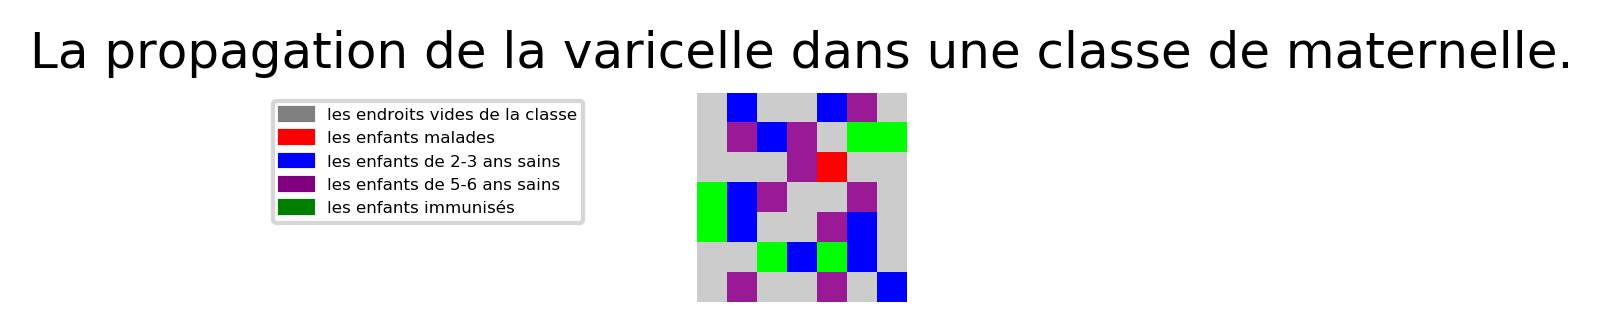

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (0,1,0)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
size = np.array(matrice.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice = initialisation_matrice()



ani = animation.FuncAnimation(fig, update,  interval=1000)

plt.show()